In [ ]:
pip install mtcnn

In [ ]:
import shutil

folder_path = "/content/data"  # Ganti "nama_folder" dengan nama folder yang ingin Anda hapus
shutil.rmtree(folder_path)

In [ ]:
from matplotlib import pyplot as plt
import cv2
from PIL import Image

import mtcnn
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle

from os import listdir
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

DIRECTORY = "/content/drive/MyDrive/dataset terbaru"
DIRECTORY_train='/content/drive/MyDrive/dataset terbaru/train/'
DIRECTORY_test='/content/drive/MyDrive/dataset terbaru/test/'

(243, 320, 3)


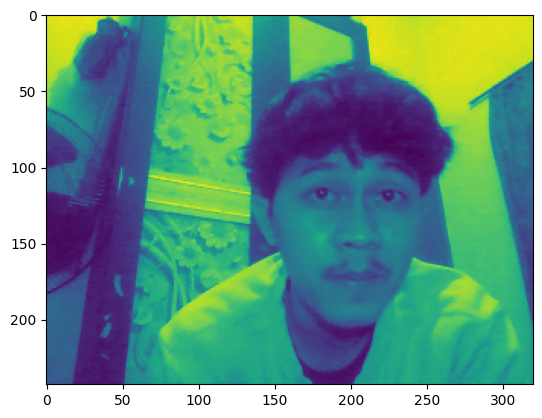

In [ ]:
filename = "/content/drive/MyDrive/dataset terbaru/test/subject02.didit2.jpg"
pixels = plt.imread(filename)

rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
print(rgb_pixels.shape)
plt.imshow(pixels)
plt.show()

In [ ]:
detector = MTCNN()

results = detector.detect_faces(rgb_pixels)
results

1/1 [==============================] - 0s 155ms/step


[{'box': [148, 78, 98, 118],
  'confidence': 0.9998912811279297,
  'keypoints': {'left_eye': (181, 119),
   'right_eye': (226, 119),
   'nose': (207, 147),
   'mouth_left': (186, 172),
   'mouth_right': (221, 172)}}]

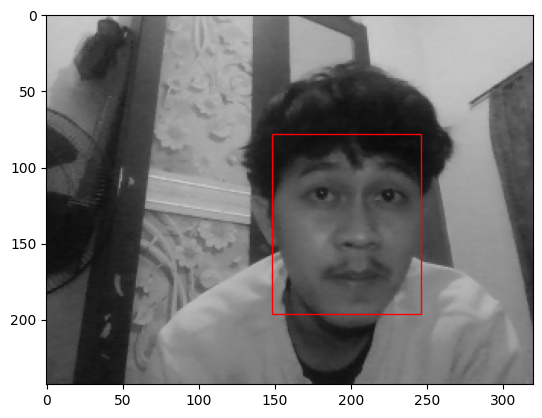

In [ ]:
def draw_image_with_boxes(data, result_list):
    plt.imshow(data)
    ax = plt.gca()
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        ax.add_patch(rect)
    plt.show()

draw_image_with_boxes(rgb_pixels, results)

1/1 [==============================] - 0s 288ms/step


1/1 [==============================] - 0s 469ms/step


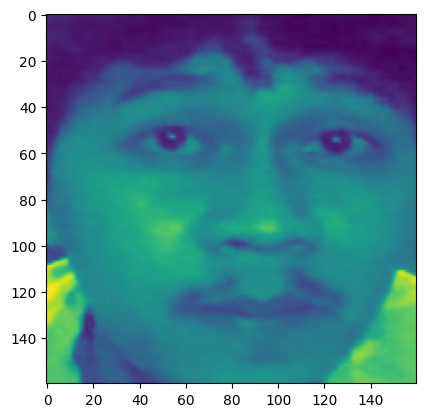

In [ ]:
def extract_face_from_file(filename, required_size=(160, 160)):
    image = Image.open(filename)

    return extract_face(image, required_size)

def extract_face(image, required_size=(160, 160)):
    image = image.convert('RGB')
    pixels = np.asarray(image)
    results = detector.detect_faces(pixels)

    x1, y1, width, height = results[0]['box']

    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    face = pixels[y1:y2, x1:x2]

    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    gray_face = cv2.cvtColor(face_array, cv2.COLOR_BGR2GRAY)

    return gray_face

detector = MTCNN()

face_pixels = extract_face_from_file("/content/drive/MyDrive/dataset terbaru/test/subject02.didit2.jpg")

plt.imshow(face_pixels)

  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▋         | 1/16 [00:01<00:23,  1.58s/it]

1/1 [==============================] - 0s 62ms/step


 12%|█▎        | 2/16 [00:03<00:21,  1.55s/it]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 3/16 [00:04<00:18,  1.43s/it]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 4/16 [00:05<00:15,  1.30s/it]

1/1 [==============================] - 0s 30ms/step


 31%|███▏      | 5/16 [00:06<00:12,  1.13s/it]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 6/16 [00:07<00:10,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 7/16 [00:08<00:08,  1.02it/s]

1/1 [==============================] - 0s 39ms/step


 50%|█████     | 8/16 [00:09<00:08,  1.02s/it]

1/1 [==============================] - 0s 39ms/step


 56%|█████▋    | 9/16 [00:10<00:07,  1.06s/it]

1/1 [==============================] - 0s 37ms/step


 62%|██████▎   | 10/16 [00:11<00:06,  1.09s/it]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 11/16 [00:12<00:05,  1.05s/it]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 12/16 [00:13<00:03,  1.02it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████▏ | 13/16 [00:14<00:02,  1.07it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 14/16 [00:14<00:01,  1.11it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 15/16 [00:15<00:00,  1.15it/s]

1/1 [==============================] - 0s 37ms/step


100%|██████████| 16/16 [00:16<00:00,  1.03s/it]


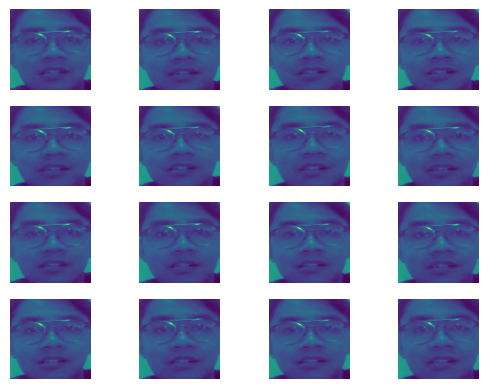

In [ ]:
def list_files(directory, contains):
    return list(f for f in listdir(directory) if contains in f)

i = 1
faces = list()
for filename in tqdm(list_files(DIRECTORY_train, "subject")[0:16]):
    # path
    path = DIRECTORY_train + filename
    # get face
    face = extract_face_from_file(path)
    # plot
    plt.subplot(4, 4, i)
    plt.axis('off')
    plt.imshow(face)
    faces.append(face)
    i += 1
plt.show()

In [ ]:
filenames = pd.DataFrame(list_files(DIRECTORY_train, "subject"))

df_train = filenames[0].str.split(".", expand=True)
df_train["filename"] = filenames

df_train = df_train.rename(columns = {0:"subject", 1:"category"})
df_train['subject'] = df_train.subject.str.replace('subject' , '')
df_train.apply(pd.to_numeric, errors='coerce').dropna()
df_train['subject'] = pd.to_numeric(df_train["subject"])
df_train

,subject,category,2,filename
0,2,didit11,jpg,subject02.didit11.jpg
1,5,sendy18,jpg,subject05.sendy18.jpg
2,5,sendy20,jpg,subject05.sendy20.jpg
3,5,sendy12,jpg,subject05.sendy12.jpg
4,5,sendy6,jpg,subject05.sendy6.jpg
...,...,...,...,...
130,4,ikhsan9,jpg,subject04.ikhsan9.jpg
131,4,ikhsan14,jpg,subject04.ikhsan14.jpg
132,4,ikhsan5,jpg,subject04.ikhsan5.jpg
133,4,ikhsan2,jpg,subject04.ikhsan2.jpg


In [ ]:
filenames2 = pd.DataFrame(list_files(DIRECTORY_test, "subject"))

df_test = filenames2[0].str.split(".", expand=True)
df_test["filename"] = filenames2

df_test = df_test.rename(columns = {0:"subject", 1:"category"})
df_test['subject'] = df_test.subject.str.replace('subject' , '')
df_test.apply(pd.to_numeric, errors='coerce').dropna()
df_test['subject'] = pd.to_numeric(df_test["subject"])
df_test

,subject,category,2,filename
0,2,didit3,jpg,subject02.didit3.jpg
1,1,bagas11,jpg,subject01.bagas11.jpg
2,1,bagas10,jpg,subject01.bagas10.jpg
3,1,bagas7,jpg,subject01.bagas7.jpg
4,2,didit2,jpg,subject02.didit2.jpg
5,2,didit1,jpg,subject02.didit1.jpg
6,1,bagas5,jpg,subject01.bagas5.jpg
7,1,bagas4,jpg,subject01.bagas4.jpg
8,1,bagas6,jpg,subject01.bagas6.jpg
9,5,sendy16,jpg,subject05.sendy16.jpg


In [ ]:
x_train=df_train.loc[:,['category','filename']]
x_test=df_test.loc[:,['category','filename']]
y_train=df_train.loc[:,['subject']]
y_test=df_test.loc[:,['subject']]

In [ ]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [ ]:
y_train = y_train.tolist()
y_test = y_test.tolist()

In [ ]:
detector = MTCNN()

def load_dataset1(dataset):
    faces = list()
    for filename in tqdm(dataset["filename"]):
        path = DIRECTORY_train + filename
        # get face
        face = extract_face_from_file(path)
        faces.append(face)
    return np.asarray(faces)

def load_dataset2(dataset):
    faces = list()
    for filename in tqdm(dataset["filename"]):
        path = DIRECTORY_test + filename
        # get face
        face = extract_face_from_file(path)
        faces.append(face)
    return np.asarray(faces)

In [ ]:
x_test = load_dataset2(x_test)
x_train = load_dataset1(x_train)

print(x_test.shape)
print(x_train.shape)

  0%|          | 0/30 [00:00<?, ?it/s]

1/1 [==============================] - 0s 159ms/step


  3%|▎         | 1/30 [00:01<00:40,  1.40s/it]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 2/30 [00:02<00:29,  1.06s/it]

1/1 [==============================] - 0s 29ms/step


 10%|█         | 3/30 [00:03<00:27,  1.02s/it]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 4/30 [00:04<00:25,  1.00it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 5/30 [00:04<00:23,  1.07it/s]

1/1 [==============================] - 0s 31ms/step


 20%|██        | 6/30 [00:05<00:22,  1.05it/s]

1/1 [==============================] - 0s 33ms/step


 23%|██▎       | 7/30 [00:06<00:22,  1.03it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██▋       | 8/30 [00:07<00:21,  1.02it/s]

1/1 [==============================] - 0s 54ms/step


 30%|███       | 9/30 [00:09<00:22,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 33%|███▎      | 10/30 [00:10<00:22,  1.12s/it]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 11/30 [00:11<00:22,  1.19s/it]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 12/30 [00:12<00:20,  1.15s/it]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 13/30 [00:13<00:18,  1.10s/it]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 14/30 [00:14<00:16,  1.05s/it]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 15/30 [00:15<00:15,  1.03s/it]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 16/30 [00:16<00:14,  1.02s/it]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 17/30 [00:17<00:12,  1.00it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 18/30 [00:18<00:11,  1.01it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 19/30 [00:19<00:10,  1.03it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 20/30 [00:21<00:11,  1.14s/it]

1/1 [==============================] - 0s 58ms/step


 70%|███████   | 21/30 [00:22<00:10,  1.19s/it]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 22/30 [00:23<00:09,  1.25s/it]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 23/30 [00:25<00:08,  1.26s/it]

1/1 [==============================] - 0s 30ms/step


 80%|████████  | 24/30 [00:26<00:07,  1.24s/it]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 25/30 [00:27<00:05,  1.16s/it]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 26/30 [00:28<00:04,  1.10s/it]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 27/30 [00:29<00:03,  1.08s/it]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 28/30 [00:30<00:02,  1.10s/it]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 29/30 [00:31<00:01,  1.07s/it]

1/1 [==============================] - 0s 27ms/step


  0%|          | 0/135 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 1/135 [00:00<01:54,  1.17it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▏         | 2/135 [00:01<02:01,  1.10it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▏         | 3/135 [00:02<02:06,  1.05it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 4/135 [00:03<02:02,  1.07it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▎         | 5/135 [00:04<02:11,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 6/135 [00:05<02:15,  1.05s/it]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 7/135 [00:07<02:19,  1.09s/it]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 8/135 [00:08<02:15,  1.07s/it]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 9/135 [00:08<02:03,  1.02it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 10/135 [00:09<01:55,  1.08it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 11/135 [00:10<01:50,  1.12it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 12/135 [00:11<01:45,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 13/135 [00:12<01:59,  1.02it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 14/135 [00:13<01:54,  1.06it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 15/135 [00:14<01:48,  1.10it/s]

1/1 [==============================] - 0s 31ms/step


 12%|█▏        | 16/135 [00:15<01:45,  1.12it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 17/135 [00:15<01:41,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 18/135 [00:16<01:39,  1.18it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 19/135 [00:17<01:37,  1.20it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▍        | 20/135 [00:18<01:42,  1.12it/s]

1/1 [==============================] - 0s 40ms/step


 16%|█▌        | 21/135 [00:19<01:50,  1.03it/s]

1/1 [==============================] - 0s 54ms/step


 16%|█▋        | 22/135 [00:21<02:15,  1.20s/it]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 23/135 [00:22<02:09,  1.16s/it]

1/1 [==============================] - 0s 39ms/step


 18%|█▊        | 24/135 [00:23<02:02,  1.10s/it]

1/1 [==============================] - 0s 38ms/step


 19%|█▊        | 25/135 [00:24<01:55,  1.05s/it]

1/1 [==============================] - 0s 42ms/step


 19%|█▉        | 26/135 [00:25<01:52,  1.03s/it]

1/1 [==============================] - 0s 38ms/step


 20%|██        | 27/135 [00:26<01:50,  1.02s/it]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 28/135 [00:27<01:47,  1.01s/it]

1/1 [==============================] - 0s 30ms/step


 21%|██▏       | 29/135 [00:28<01:43,  1.02it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 30/135 [00:29<01:39,  1.05it/s]

1/1 [==============================] - 0s 39ms/step


 23%|██▎       | 31/135 [00:30<01:40,  1.04it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▎       | 32/135 [00:31<01:39,  1.04it/s]

1/1 [==============================] - 0s 55ms/step


 24%|██▍       | 33/135 [00:32<01:36,  1.06it/s]

1/1 [==============================] - 0s 39ms/step


 25%|██▌       | 34/135 [00:33<01:42,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


 26%|██▌       | 35/135 [00:34<01:47,  1.08s/it]

1/1 [==============================] - 0s 50ms/step


 27%|██▋       | 36/135 [00:35<01:50,  1.12s/it]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 37/135 [00:36<01:45,  1.08s/it]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 38/135 [00:37<01:51,  1.14s/it]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 39/135 [00:39<01:52,  1.18s/it]

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 40/135 [00:40<01:41,  1.07s/it]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 41/135 [00:40<01:33,  1.00it/s]

1/1 [==============================] - 0s 40ms/step


 31%|███       | 42/135 [00:41<01:27,  1.06it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 43/135 [00:42<01:23,  1.11it/s]

1/1 [==============================] - 0s 30ms/step


 33%|███▎      | 44/135 [00:43<01:20,  1.13it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 45/135 [00:44<01:17,  1.16it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▍      | 46/135 [00:44<01:15,  1.18it/s]

1/1 [==============================] - 0s 31ms/step


 35%|███▍      | 47/135 [00:45<01:13,  1.20it/s]

1/1 [==============================] - 0s 48ms/step


 36%|███▌      | 48/135 [00:46<01:17,  1.12it/s]

1/1 [==============================] - 0s 43ms/step


 36%|███▋      | 49/135 [00:47<01:22,  1.04it/s]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 50/135 [00:49<01:26,  1.02s/it]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 51/135 [00:50<01:29,  1.07s/it]

1/1 [==============================] - 0s 30ms/step


 39%|███▊      | 52/135 [00:51<01:22,  1.01it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███▉      | 53/135 [00:51<01:17,  1.06it/s]

1/1 [==============================] - 0s 27ms/step


 40%|████      | 54/135 [00:52<01:13,  1.10it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 55/135 [00:53<01:10,  1.13it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████▏     | 56/135 [00:54<01:08,  1.15it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████▏     | 57/135 [00:55<01:06,  1.17it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 58/135 [00:56<01:05,  1.18it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▎     | 59/135 [00:56<01:04,  1.18it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 60/135 [00:57<01:03,  1.18it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 61/135 [00:58<01:02,  1.18it/s]

1/1 [==============================] - 0s 51ms/step


 46%|████▌     | 62/135 [00:59<01:01,  1.18it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 63/135 [01:00<01:00,  1.20it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 64/135 [01:01<01:05,  1.09it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 65/135 [01:02<01:08,  1.03it/s]

1/1 [==============================] - 0s 51ms/step


 49%|████▉     | 66/135 [01:03<01:10,  1.03s/it]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 67/135 [01:04<01:12,  1.07s/it]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 68/135 [01:05<01:06,  1.00it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 69/135 [01:06<01:02,  1.06it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 70/135 [01:07<00:58,  1.11it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 71/135 [01:08<00:57,  1.12it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 72/135 [01:08<00:54,  1.15it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 73/135 [01:09<00:53,  1.17it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 74/135 [01:10<00:51,  1.18it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 75/135 [01:11<00:50,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▋    | 76/135 [01:12<00:49,  1.20it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 77/135 [01:13<00:48,  1.20it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 78/135 [01:13<00:47,  1.20it/s]

1/1 [==============================] - 0s 48ms/step


 59%|█████▊    | 79/135 [01:14<00:48,  1.16it/s]

1/1 [==============================] - 0s 51ms/step


 59%|█████▉    | 80/135 [01:16<00:53,  1.02it/s]

1/1 [==============================] - 0s 53ms/step


 60%|██████    | 81/135 [01:17<00:57,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 61%|██████    | 82/135 [01:18<00:58,  1.11s/it]

1/1 [==============================] - 0s 29ms/step


 61%|██████▏   | 83/135 [01:19<00:54,  1.06s/it]

1/1 [==============================] - 0s 40ms/step


 62%|██████▏   | 84/135 [01:20<00:50,  1.01it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 85/135 [01:21<00:47,  1.06it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▎   | 86/135 [01:21<00:44,  1.10it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 87/135 [01:22<00:42,  1.13it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▌   | 88/135 [01:23<00:41,  1.14it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 89/135 [01:24<00:39,  1.15it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 90/135 [01:25<00:39,  1.15it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 91/135 [01:26<00:38,  1.15it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 92/135 [01:27<00:37,  1.16it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████▉   | 93/135 [01:27<00:36,  1.14it/s]

1/1 [==============================] - 0s 36ms/step


 70%|██████▉   | 94/135 [01:28<00:35,  1.15it/s]

1/1 [==============================] - 0s 55ms/step


 70%|███████   | 95/135 [01:30<00:38,  1.03it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████   | 96/135 [01:31<00:40,  1.03s/it]

1/1 [==============================] - 0s 80ms/step


 72%|███████▏  | 97/135 [01:32<00:41,  1.09s/it]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 98/135 [01:33<00:40,  1.09s/it]

1/1 [==============================] - 0s 133ms/step


 73%|███████▎  | 99/135 [01:34<00:42,  1.18s/it]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 100/135 [01:35<00:38,  1.11s/it]

1/1 [==============================] - 0s 35ms/step


 75%|███████▍  | 101/135 [01:36<00:36,  1.07s/it]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 102/135 [01:37<00:34,  1.06s/it]

1/1 [==============================] - 0s 36ms/step


 76%|███████▋  | 103/135 [01:38<00:33,  1.06s/it]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 104/135 [01:39<00:32,  1.03s/it]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 105/135 [01:40<00:29,  1.01it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▊  | 106/135 [01:41<00:27,  1.05it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 107/135 [01:42<00:26,  1.07it/s]

1/1 [==============================] - 0s 55ms/step


 80%|████████  | 108/135 [01:43<00:25,  1.06it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 109/135 [01:44<00:27,  1.04s/it]

1/1 [==============================] - 0s 70ms/step


 81%|████████▏ | 110/135 [01:46<00:27,  1.09s/it]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 111/135 [01:47<00:31,  1.32s/it]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 112/135 [01:48<00:28,  1.23s/it]

1/1 [==============================] - 0s 38ms/step


 84%|████████▎ | 113/135 [01:49<00:25,  1.18s/it]

1/1 [==============================] - 0s 40ms/step


 84%|████████▍ | 114/135 [01:51<00:24,  1.16s/it]

1/1 [==============================] - 0s 40ms/step


 85%|████████▌ | 115/135 [01:52<00:22,  1.14s/it]

1/1 [==============================] - 0s 40ms/step


 86%|████████▌ | 116/135 [01:53<00:21,  1.13s/it]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 117/135 [01:54<00:19,  1.10s/it]

1/1 [==============================] - 0s 54ms/step


 87%|████████▋ | 118/135 [01:55<00:18,  1.07s/it]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 119/135 [01:56<00:16,  1.05s/it]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 120/135 [01:57<00:15,  1.05s/it]

1/1 [==============================] - 0s 40ms/step


 90%|████████▉ | 121/135 [01:58<00:15,  1.11s/it]

1/1 [==============================] - 0s 53ms/step


 90%|█████████ | 122/135 [01:59<00:15,  1.18s/it]

1/1 [==============================] - 0s 51ms/step


 91%|█████████ | 123/135 [02:01<00:14,  1.23s/it]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 124/135 [02:02<00:13,  1.20s/it]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 125/135 [02:03<00:11,  1.15s/it]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 126/135 [02:04<00:09,  1.10s/it]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 127/135 [02:05<00:08,  1.06s/it]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 128/135 [02:06<00:07,  1.01s/it]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 129/135 [02:07<00:05,  1.03it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▋| 130/135 [02:08<00:04,  1.06it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 131/135 [02:08<00:03,  1.06it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 132/135 [02:09<00:02,  1.08it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 133/135 [02:10<00:01,  1.11it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 134/135 [02:11<00:00,  1.13it/s]

1/1 [==============================] - 0s 43ms/step


100%|██████████| 135/135 [02:12<00:00,  1.02it/s]

(30, 160, 160)
(135, 160, 160)


In [ ]:
TRAINING_DATA_DIRECTORY = "data/train"
TESTING_DATA_DIRECTORY = "data/test"
NUM_CLASSES = 5
EPOCHS = 50
BATCH_SIZE = 20
NUMBER_OF_TRAINING_IMAGES = 135
NUMBER_OF_TESTING_IMAGES = 30
IMAGE_HEIGHT = 160
IMAGE_WIDTH = 160

In [ ]:
import os

def save_keras_dataset(setname, dataset, labels, per_class):
    data = sorted(list(zip(labels, dataset)), key=lambda x: x[0])

    j = 0
    for label, gray_img in tqdm(data):
        j = (j% per_class) + 1

        directory = f"data/{setname}/class_{label}/"
        if not os.path.exists(directory):
                os.makedirs(directory)
        cv2.imwrite(f"{directory}class_{label}_{j}.png",gray_img)

In [ ]:
import shutil
shutil.rmtree(r'data', ignore_errors=True)

# Save datasets
save_keras_dataset("test", x_test, y_test, 6)
save_keras_dataset("train", x_train, y_train, 27)

100%|██████████| 135/135 [00:00<00:00, 999.29it/s] 


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def data_generator():
    return ImageDataGenerator(
        rescale=1./255,

    )

def add_noise(img):
    """Add random noise to an image"""
    VARIABILITY = 35
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

In [ ]:
training_generator = data_generator().flow_from_directory(
    TRAINING_DATA_DIRECTORY,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale'
)

testing_generator = data_generator().flow_from_directory(
    TESTING_DATA_DIRECTORY,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    class_mode='categorical',
    color_mode='grayscale'
)

validation_generator = data_generator().flow_from_directory(
    TESTING_DATA_DIRECTORY,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)

Found 135 images belonging to 5 classes.
Found 30 images belonging to 5 classes.
Found 30 images belonging to 5 classes.


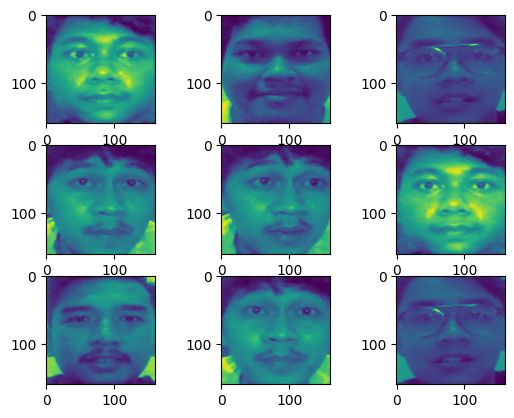

In [ ]:
sample_images = testing_generator.next()[0]

f, xyarr = plt.subplots(3,3)
xyarr[0,0].imshow(sample_images[0])
xyarr[0,1].imshow(sample_images[1])
xyarr[0,2].imshow(sample_images[2])
xyarr[1,0].imshow(sample_images[3])
xyarr[1,1].imshow(sample_images[4])
xyarr[1,2].imshow(sample_images[5])
xyarr[2,0].imshow(sample_images[6])
xyarr[2,1].imshow(sample_images[7])
xyarr[2,2].imshow(sample_images[8])
plt.show()

In [ ]:
import keras
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras.layers import Activation, ZeroPadding2D, MaxPooling2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers, constraints

model = models.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 1), padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_initializer="glorot_uniform", kernel_regularizer=regularizers.l2(l2=0.01)))

model.add(MCDropout(rate=0.5))

model.add(Dense(NUM_CLASSES, activation='softmax', kernel_initializer="glorot_uniform"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 160, 160, 32)      320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 80, 80, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 78, 78, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 39, 39, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 18, 18, 128)      0

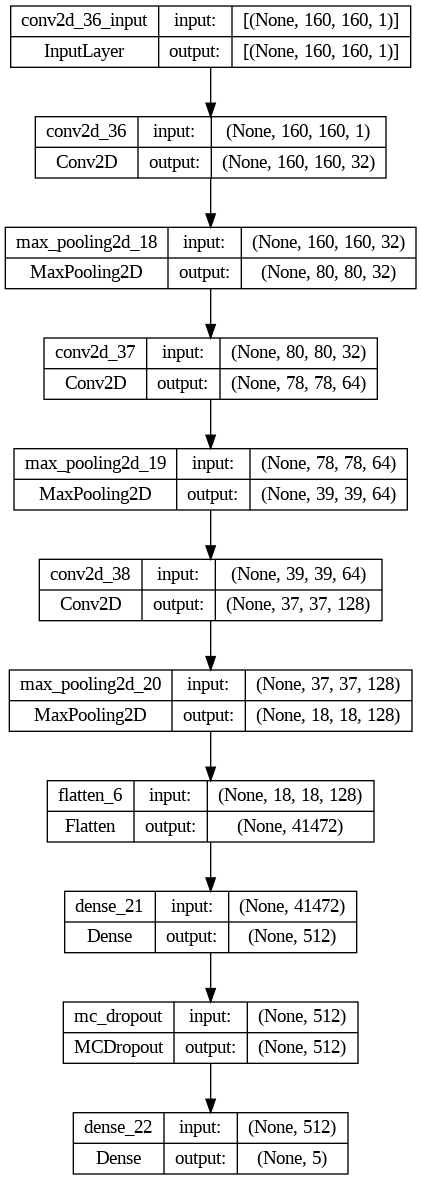

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

model.compile(
    loss=losses.CategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(learning_rate=0.0003),
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    training_generator,
    steps_per_epoch=(NUMBER_OF_TRAINING_IMAGES//BATCH_SIZE ),
    epochs=EPOCHS,
    validation_data=testing_generator,
    shuffle=True,
    validation_steps=(NUMBER_OF_TESTING_IMAGES//BATCH_SIZE),
    #callbacks=[early_stopping]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6/6 [==============================] - 12s 2s/step - loss: 11.5601 - accuracy: 0.2174 - val_loss: 9.5191 - val_accuracy: 0.3000
Epoch 2/50
6/6 [==============================] - 11s 2s/step - loss: 8.3261 - accuracy: 0.4174 - val_loss: 6.9211 - val_accuracy: 0.4000
Epoch 3/50
6/6 [==============================] - 9s 2s/step - loss: 5.9232 - accuracy: 0.7130 - val_loss: 4.9301 - val_accuracy: 0.7333
Epoch 4/50
6/6 [==============================] - 9s 1s/step - loss: 4.1533 - accuracy: 0.8174 - val_loss: 3.9184 - val_accuracy: 0.8000
Epoch 5/50
6/6 [==============================] - 11s 2s/step - loss: 3.1798 - accuracy: 0.8435 - val_loss: 3.4492 - val_accuracy: 0.8333
Epoch 6/50
6/6 [==============================] - 9s 2s/step - loss: 2.7642 - accuracy: 0.8696 - val_loss: 2.9562 - val_accuracy: 0.8333
Epoch 7/50
6/6 [==============================] - 10s 1s/step - loss: 2.4836 - accuracy: 0.8957 - val_loss: 2.7952 - val_accuracy: 0.8333
Epoch 8/50
6/6 [==============================]

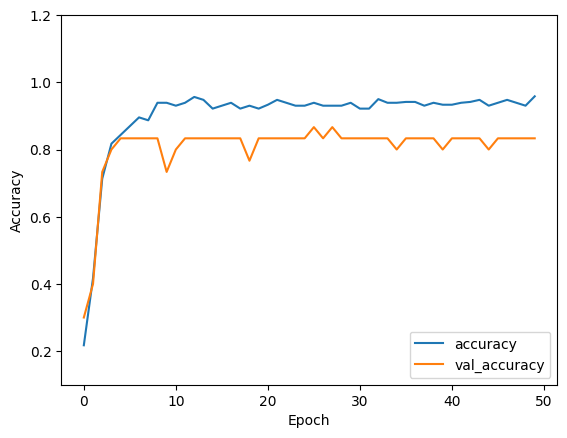

In [ ]:
plot_folder = "plot"
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1.2])
plt.legend(loc='lower right')

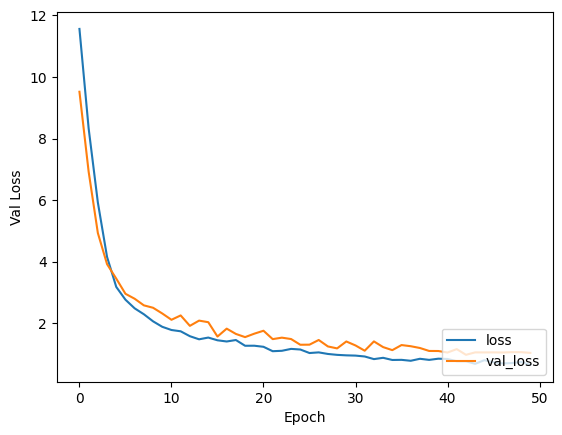

In [ ]:
plot_folder = "plot"
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Val Loss')
plt.legend(loc='lower right')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(validation_generator.classes, y_pred))
print(validation_generator.classes)
print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

1/1 [==============================] - 1s 609ms/step
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.71      0.83      0.77         6
           2       0.86      1.00      0.92         6
           3       1.00      0.83      0.91         6
           4       0.83      0.83      0.83         6

    accuracy                           0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30

[0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4]
[2 1 0 0 0 0 1 1 1 1 4 1 2 2 2 2 2 2 3 3 3 0 3 3 4 4 4 1 4 4]
Confusion Matrix
[[4 1 1 0 0]
 [0 5 0 0 1]
 [0 0 6 0 0]
 [1 0 0 5 0]
 [0 1 0 0 5]]
